## Data Discovery Analysis ##
### Individual Federal Campaign Contributors and the Contributions They Made, 2016 ##

Data Source: U.S. Federal Elections Commission 


##### Dataset Overview:
Data preparation begins with the the collection of Federal Election Commission (FEC) data on a segment of contributions made to two federal campaign committees associated with two federal candidates -- Hillary Clinton and Donald Trump.

The timeframes for the final set of contributions starts at the beginning of the general election, i.e. when the two candidates became the official nominee for their respective parties and run through 12/31/2016:

- Hillary Clinton: nomination/start date 7/26/2016 (159 days to end of calendar year)
- Donald Trump: nomination/start date 7/19/2016 (166 days to end of calendar year)

##### Dataset Qualifications:
1) Initial acquisition of FEC data included the full inventory of itemized contributions to all federal candidates between 1/1/2015 to 12/31/2016 (designated the 2016 Election Cycle).  The file, totaling 20.3 million contributions, represents over $1.45 Billion in gross revenue to federal campaigns for President, House and Senate.

A MySql database was create to handle the initial manipulation of the data.

2) Data selects were completed on the initial set to isolate itemized contributions made to the principal campaign committees of Hillary Clinton (Hillary for America, C00575795) and Donald Trump (Donald J. Trump for President, Inc., C00580100). These contributions covered the full, two year election cycle (2015 and 2016).  The campaign commitee will be represented throughout this project with the designations HRC for Hillary for America and DJT for Donald J. Trump for President, Inc.

- HRC, 1/1/2015 - 12/31/2016: 2,516,367 itemized contributions totaling 293.6M in campaign revenue.
- DJT, 4/2/2015 - 12/31/2016: 139,838 itemized contributions totaling 65.3M in campaign revenue.

3) Additional data selects and aggregations were completed to prepare the final sets for analysis:

- Transaction date screen to set the analysis timeline from each candidates' nomination date to the end of the year.
- Account type screen to ensure contributions where made only to the candidates' GENERAL ELECTION accounts.
- Transaction type screen to ensure only qualified, INDIVIDUAL contributions were included (i.e. no committee transfers, PAC contributions, etc.)
- The creation of a unique NAMEKEY for donors and subsequent grouping/aggregation of disting namekeys to create a DONOR level table (PEOPLE).

The final datasets for analysis consist of:

- CONTRIBUTIONS TABLE = 1,800,321 itemized contributions totaling 153.3M in campaign revenue.
    -  HRC = 1,718,315 itemized contributions totaling 108M in campaign revenue.
    -  DJT = 82,006 itemized contributions totaling 45.3M in campaign revenue.


- PEOPLE TABLE =  383,272 donors making 1,800,321 itemized contributions totaling 153.3M in campaign revenue.
    -  HRC = 325,640 donors making 1,718,315 contributions totaling 108M in campaign revenue.
    -  DJT = 57,632 donors making 82,006 contributions totaling 45.3M in campaign revenue.
  

In [2]:
%matplotlib inline
# Dependencies and Setup, short list
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [20]:
# load contribution_df directly from local folder/csv -- employ io.parser on read to control for zip_code via dtype arg on load
# take basic measures of PDs.
contributionsDF = pd.io.parsers.read_csv('contributions_12292018.csv',sep=";", low_memory=False, dtype={'ZIP_CODE': 'str'})

In [21]:
contributionsDF.shape

(1800321, 16)

In [91]:
contributionsDF.describe()

,TRANSACTION_DT,TRANSACTION_AMT,FILE_NUM,SUB_ID
count,1.800321e+06,1.800321e+06,1.800321e+06,1.800321e+06
mean,9.581063e+06,8.514209e+01,1.140434e+06,2.147484e+09
std,1.082821e+06,7.890340e+03,1.719498e+04,0.000000e+00
min,7.192016e+06,1.000000e+00,1.109498e+06,2.147484e+09
25%,9.072016e+06,1.500000e+01,1.137625e+06,2.147484e+09
50%,1.004202e+07,2.500000e+01,1.137788e+06,2.147484e+09
75%,1.028202e+07,7.500000e+01,1.148953e+06,2.147484e+09
max,1.231202e+07,1.000000e+07,1.291697e+06,2.147484e+09


In [23]:
 #fillna zip_code vals with '00000' and remove zip4 values, leaving zip5 only, leading zeros intact.
contributionsDF['ZIP_CODE'].fillna('00000', inplace = True)
contributionsDF['ZIP_CODE'] = [x[0:5] for x in contributionsDF['ZIP_CODE']]

In [24]:
contributionsDF.head()

,CMTE_ID,candidate,RPT_TP,TRANSACTION_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,TRAN_ID,FILE_NUM,SUB_ID,namekey
0,C00580100,djt,M8,15,"WEST, BRETT",RIDGEFIELD,CT,06877,RETIRED,RETIRED,7192016,89,SA17A.1828787,1291697,2147483647,"WEST, BRETT06877"
1,C00580100,djt,M8,15,"BROWNING, MELISSA",WESTLAKE,TX,76262,SELF-EMPLOYED,RANCHER,7192016,2700,SA17A.1828524,1291697,2147483647,"BROWNING, MELISSA76262"
2,C00580100,djt,M8,15,"HICKS JR, THOMAS",DALLAS,TX,75201,HICKS HOLDINGS LLC,INVESTOR,7192016,2700,SA17A.1828566,1291697,2147483647,"HICKS JR, THOMAS75201"
3,C00580100,djt,M8,15,"HARRISON, BRIAN",PROVO,UT,84604,SELF-EMPLOYED,LAWYER,7192016,80,SA17A.1828719,1291697,2147483647,"HARRISON, BRIAN84604"
4,C00580100,djt,M8,15,"HARLING, MICHAEL",DALLAS,TX,75220,MUNICIPAL CAPITAL MARKETS,INVESTMENT BANKER,7192016,1000,SA17A.1828715,1291697,2147483647,"HARLING, MICHAEL75220"


In [39]:
# load people_df directly from local folder/csv
peopleDF = pd.read_csv('people_12292018.csv',sep=";", dtype={'zip_code': 'str'})

In [40]:
peopleDF.shape

(383272, 10)

In [41]:
peopleDF.describe()

,contributions,total
count,383272.000000,3.832720e+05
mean,4.697241,3.999329e+02
std,7.791240,2.608330e+04
min,1.000000,1.000000e+00
25%,1.000000,1.000000e+02
50%,2.000000,2.000000e+02
75%,5.000000,3.880000e+02
max,1520.000000,1.614081e+07


In [42]:
 #fillna zip_code vals with '00000' and remove zip4 values, leaving zip5 only, leading zeros intact.
peopleDF['zip_code'].fillna('00000', inplace = True)
peopleDF['zip_code'] = [x[0:5] for x in peopleDF['zip_code']]

In [43]:
peopleDF.head(50)

,namekey,contributions,total,candidate,name,city,state,zip_code,employer,occupation
0,"WEST, BRETT06877",1,89,djt,"WEST, BRETT",RIDGEFIELD,CT,06877,RETIRED,RETIRED
1,"HARRISON, BRIAN84604",1,80,djt,"HARRISON, BRIAN",PROVO,UT,84604,SELF-EMPLOYED,LAWYER
2,"BROWNING, MELISSA76262",1,2700,djt,"BROWNING, MELISSA",WESTLAKE,TX,76262,SELF-EMPLOYED,RANCHER
3,"HICKS JR, THOMAS75201",1,2700,djt,"HICKS JR, THOMAS",DALLAS,TX,75201,HICKS HOLDINGS LLC,INVESTOR
4,"MCCORD, NANCY37311",1,1000,djt,"MCCORD, NANCY",CLEVELAND,TN,37311,HOMEMAKER,HOMEMAKER
5,"MOODY, DAN JR77098",1,1500,djt,"MOODY, DAN JR",HOUSTON,TX,77098,NaN,NaN
6,"KOLLAR, J B MR.29072",1,300,djt,"KOLLAR, J B MR.",LEXINGTON,SC,29072,NaN,NaN
7,"RYAN, SCOTT52314",1,1095,djt,"RYAN, SCOTT",MT. VERNON,IA,52314,RYAN MOTORS,BUSINESS OWNER
8,"RUESTERHOLZ, SCOTT10021",2,999,djt,"RUESTERHOLZ, SCOTT",NEW YORK,NY,10021,BNY MELLON,FINANCIAL ANALYST
9,"ZIROLI, CLEM89135",1,32,djt,"ZIROLI, CLEM",LAS VEGAS,NV,89135,DIAMOND CREEK,REAL ESTATE


#### Analysis of Incremental Revenue gained through the general election timeframe:

A data table was created to analyse the growth of itemized, individual contributions throughout the general election timeframe of the 2016 campaign.  The dataset is a day by day accounting of itemized individual revenue collected by the two campaigns and contains data on the number of daily contributions received, the sum total of a  day's donations and the average donation amount.

These daily figures are compared to general election timeframe totals to provide the percent contribution of any day's donation count and sum total to the timeframe sum total.  The dataset also provides the percent contribution of any day's donation count and sum total to the grand total of itemized individual donation for the full campaign cycle.  The starting points for this comparisson are as follows:

- HRC, Coverage dates: 01/01/2013 to 12/31/2016. Total Itemized individual contributions	300,115,258 dollars
    -  36% of itemized individual contribution revenue raised in the general election timeframe, 7/26/16 - 12/31/2016
- DJT, Coverage dates: 04/02/2015 to 12/31/2016. Total Itemized individual contributions	 46,982,264 dollars
    -  96% of itemized individual contribution revenue raised in the general election timeframe, 7/19/2016 - 12/31/2016

##### Incremental Value Table Headings (headings repeat for HRC):

-  djt_day:		Day number of general election timeframe
-  djt_date:     Date 
-  djt_count:	Count of itemized donations
-  djt_cc:		Day's contribution to timeframe total of itemized donation count
-  djt_tot:		Day's total revenue
-  djt_tc:		Day's contribution to timeframe total of itemized donation revenue
-  djt_tot3:	    Three day moving average of daily revenue
-  djt_avg:		Day's average donation amount
-  djt_avg3:	    Three day moving average of average donation amount
-  djt_inc:		Incremental percentage increase of day's revenue compared to entire campaigns's itemized receipts
-  djt_culm:	    Culmulative total of incremental increase of day's revenue to entire campaign's itemized receipts


In [57]:
# load incremental_value DF directly from local folder/csv
incremental_valueDF = pd.read_csv('incremental_value.csv',sep=',')

In [58]:
incremental_valueDF.head()

,djt_day,djt_date,djt_count,djt_cc,djt_tot,djt_tc,djt_tot3,djt_avg,djt_avg3,djt_inc,...,hrc_date,hrc_count,hrc_cc,hrc_tot,hrc_tc,hrc_tot3,hrc_avg,hrc_avg3,hrc_inc,hrc_culm
0,1,7192016,7,0.000085,7869,0.000174,0,1124,0,0.000167,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0
1,2,7202016,17,0.000207,20533,0.000453,0,1208,0,0.000437,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0
2,3,7212016,42,0.000512,56481,0.001247,28294,1345,1226,0.001202,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0
3,4,7222016,3315,0.040424,1009724,0.022295,362246,305,952,0.021492,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0
4,5,7232016,1428,0.017413,381511,0.008424,482572,267,639,0.008120,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0


In [22]:
incremental_valueDF.describe()

,djt_day,djt_date,djt_count,djt_cc,djt_tot,djt_tc,djt_tot3,djt_avg,djt_avg3,djt_inc,...,hrc_date,hrc_count,hrc_cc,hrc_tot,hrc_tc,hrc_tot3,hrc_avg,hrc_avg3,hrc_inc,hrc_culm
count,166.000000,1.660000e+02,166.000000,166.000000,1.660000e+02,166.000000,1.660000e+02,166.000000,166.000000,166.000000,...,1.660000e+02,166.000000,166.000000,1.660000e+02,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000
mean,83.500000,9.932317e+06,494.012048,0.006024,2.728217e+05,0.006024,2.726985e+05,486.777108,478.536145,0.005807,...,6.006312e+06,10351.295181,0.006024,6.505705e+05,0.006024,6.481313e+05,44.993976,41.753012,0.002168,0.098196
std,48.064193,1.577378e+06,579.377618,0.007065,8.814885e+05,0.019464,5.399518e+05,673.306742,418.939247,0.018762,...,4.495989e+06,11305.645460,0.006580,7.404002e+05,0.006856,6.895022e+05,48.150962,35.992497,0.002467,0.107665
min,1.000000,7.192016e+06,3.000000,0.000037,5.490000e+02,0.000012,0.000000e+00,99.000000,0.000000,0.000012,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,42.250000,8.294516e+06,43.000000,0.000524,1.287000e+04,0.000284,1.428150e+04,257.500000,279.250000,0.000274,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,83.500000,1.009702e+07,365.500000,0.004457,1.625255e+05,0.003589,1.660140e+05,359.500000,363.500000,0.003459,...,8.197016e+06,8420.500000,0.004901,5.446770e+05,0.005043,5.769505e+05,53.000000,54.000000,0.001815,0.064491
75%,124.750000,1.119952e+07,654.750000,0.007984,2.599095e+05,0.005739,2.841212e+05,484.750000,480.250000,0.005532,...,9.299516e+06,14846.250000,0.008640,8.863178e+05,0.008207,9.192722e+05,64.750000,64.000000,0.002953,0.182070
max,166.000000,1.231202e+07,3315.000000,0.040424,1.049650e+07,0.231770,3.849807e+06,8006.000000,2917.000000,0.223414,...,1.110202e+07,44633.000000,0.025975,2.959349e+06,0.027403,2.823473e+06,401.000000,192.000000,0.009861,0.359844


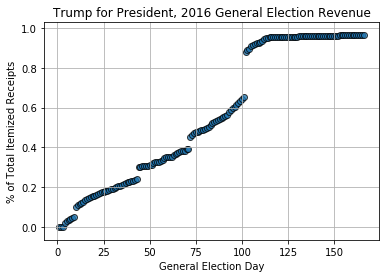

In [26]:
# Plot #1 -- Lat x Temp. use plt. functions to create and control plot line by line
plt.scatter(incremental_valueDF['djt_day'], incremental_valueDF['djt_culm'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 0.5)
plt.title("Trump for President, 2016 General Election Revenue")
plt.xlabel("General Election Day")
plt.ylabel("% of Total Itemized Receipts")
plt.grid()
plt.show()

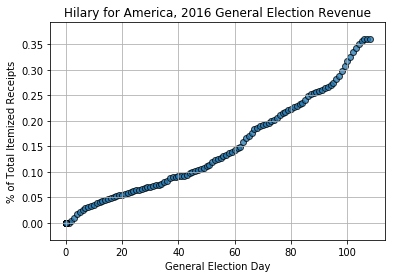

In [27]:
# Plot #1 -- Lat x Temp. use plt. functions to create and control plot line by line
plt.scatter(incremental_valueDF['hrc_day'], incremental_valueDF['hrc_culm'],
            edgecolors = 'black',
            alpha = 0.75) #, weather_data_df['max temp'] *10, alpha = 0.5)
plt.title("Hilary for America, 2016 General Election Revenue")
plt.xlabel("General Election Day")
plt.ylabel("% of Total Itemized Receipts")
plt.grid()
plt.show()

### Begin Zip code level work
Creates zipCands dataframe containg zip code, candidate, count of unique key (namekey) plus sum and average of transaction amount in each zip_code+camdidate combination.

-  Total of 34,097 zip_code+candidate combinations exist.


Question, do we want to look at this as three different dataframes -- onw for hrc, one for djt and one totals/combined?  I beleive the unique zip_code count for the set is 22k.  We are making that count, in this case, 34k because we are breaking it by candidate.


In [93]:
# create zipSums dataframe using groupby zip_code and candidate -- count unique key, sum and average the transaction_amt

zipCands = contributionsDF.groupby(['ZIP_CODE','candidate'], as_index=False).agg({'STATE': ['count'], 'TRANSACTION_AMT': ['sum', 'mean']})

zipCands.head()


ZIP_CODE candidate STATE TRANSACTION_AMT            
                     count             sum        mean
0    00000       djt     1            1250  625.000000
1    00000       hrc  1160          667214  151.743007
2    00135       hrc     1              75   75.000000
3    00512       djt     1             250  250.000000
4    00602       hrc     1              60   60.000000

In [86]:
zipCands.shape

(34097, 5)